In [1]:
from src.preamble import *

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


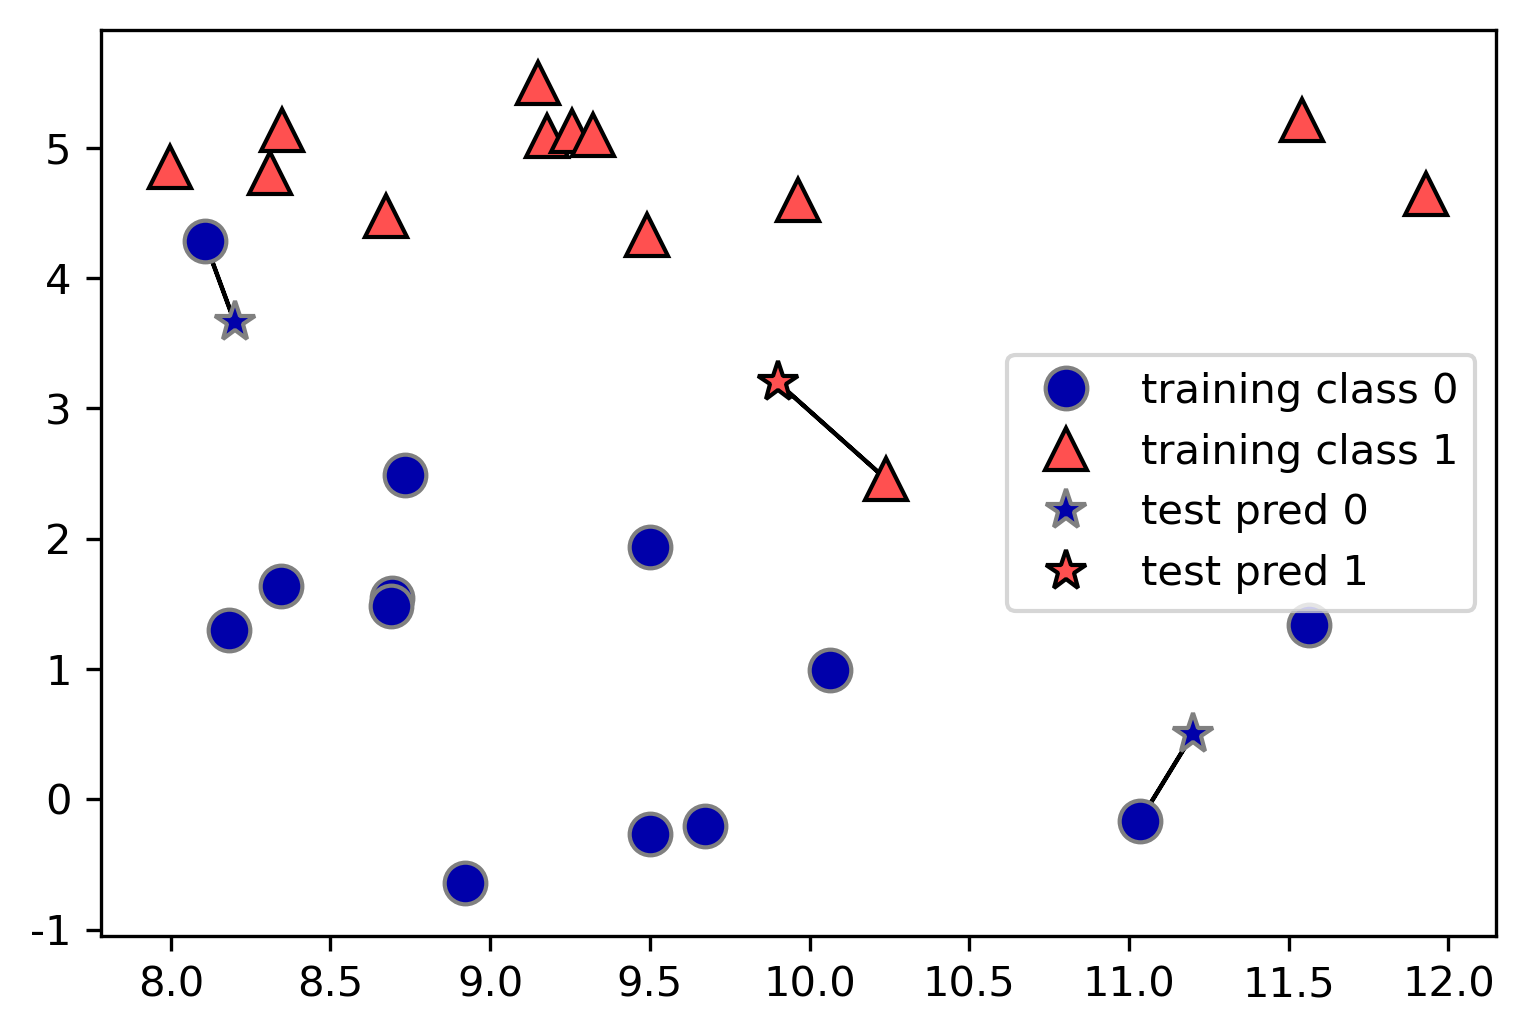

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


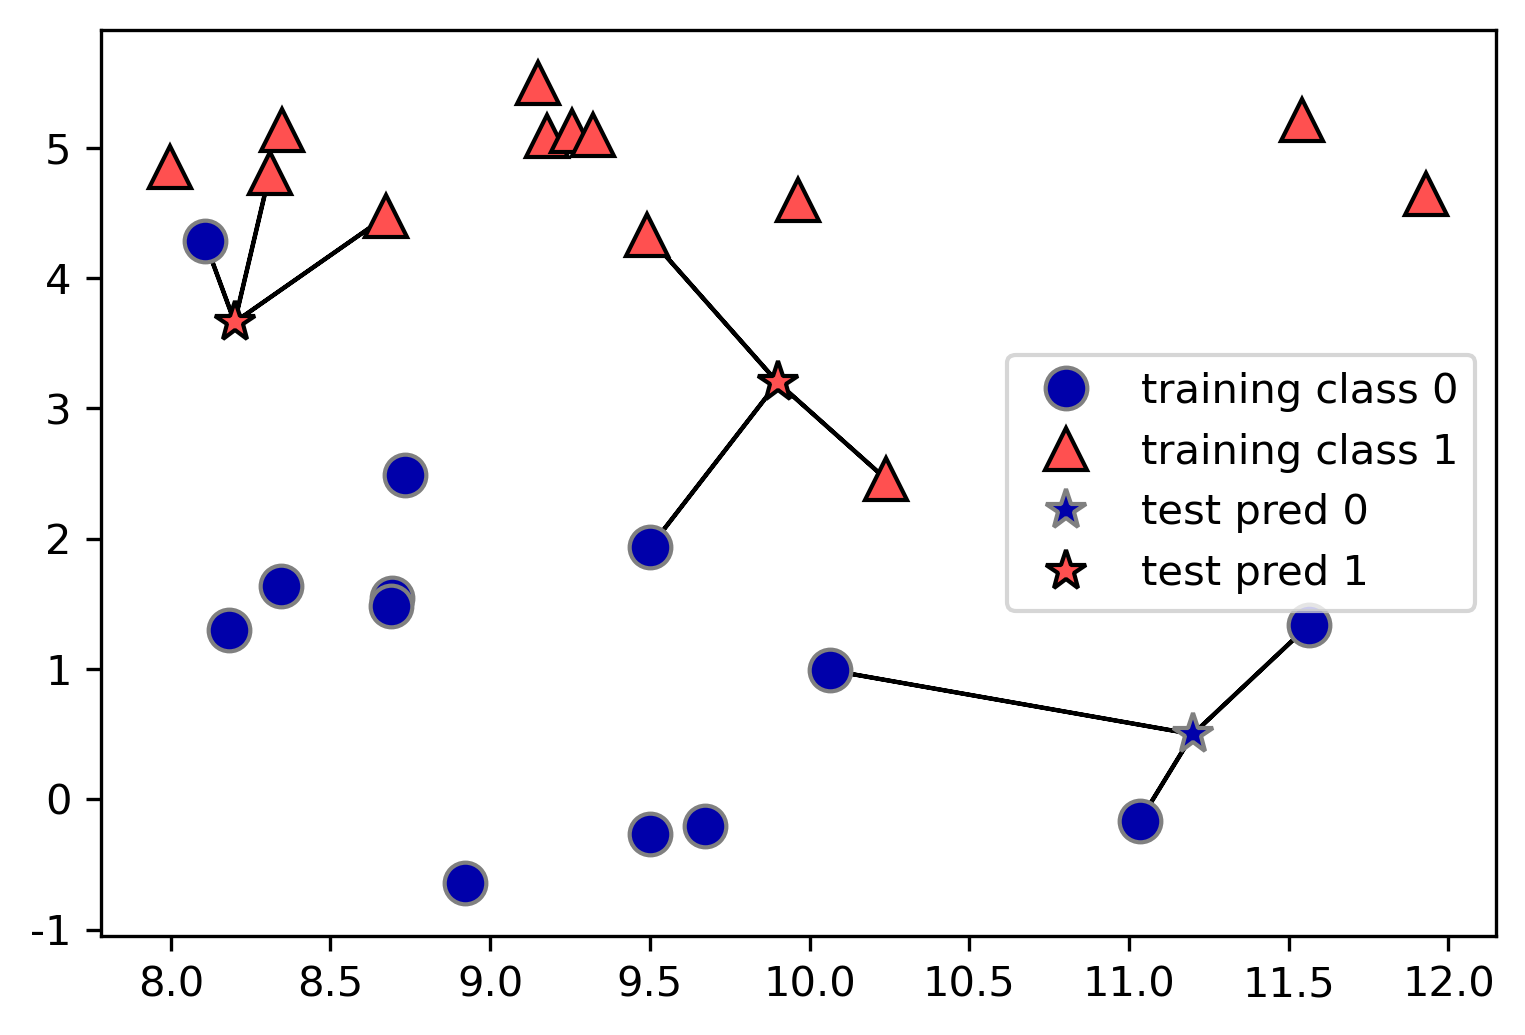

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

이처럼 분류기로서의 역량을 늘려주기 위해 KNN은 K값으로 주로 홀수를 넣어준다.

In [4]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [6]:
clf.fit(X_train, y_train) # 학습하라 하지만 knn은 학습이랄 것이 딱히 없다.

KNeighborsClassifier(n_neighbors=3)

In [14]:
y_pred = clf.predict(X_test)
print(f'Test set prediction: {y_pred}')
y_test

Test set prediction: [1 0 1 0 1 0 0]


array([1, 0, 1, 0, 1, 1, 0])

In [9]:
print(f'Test set accuracy: {clf.score(X_test, y_test):.2f}')

Test set accuracy: 0.86


## KNeighborClassifier 분석

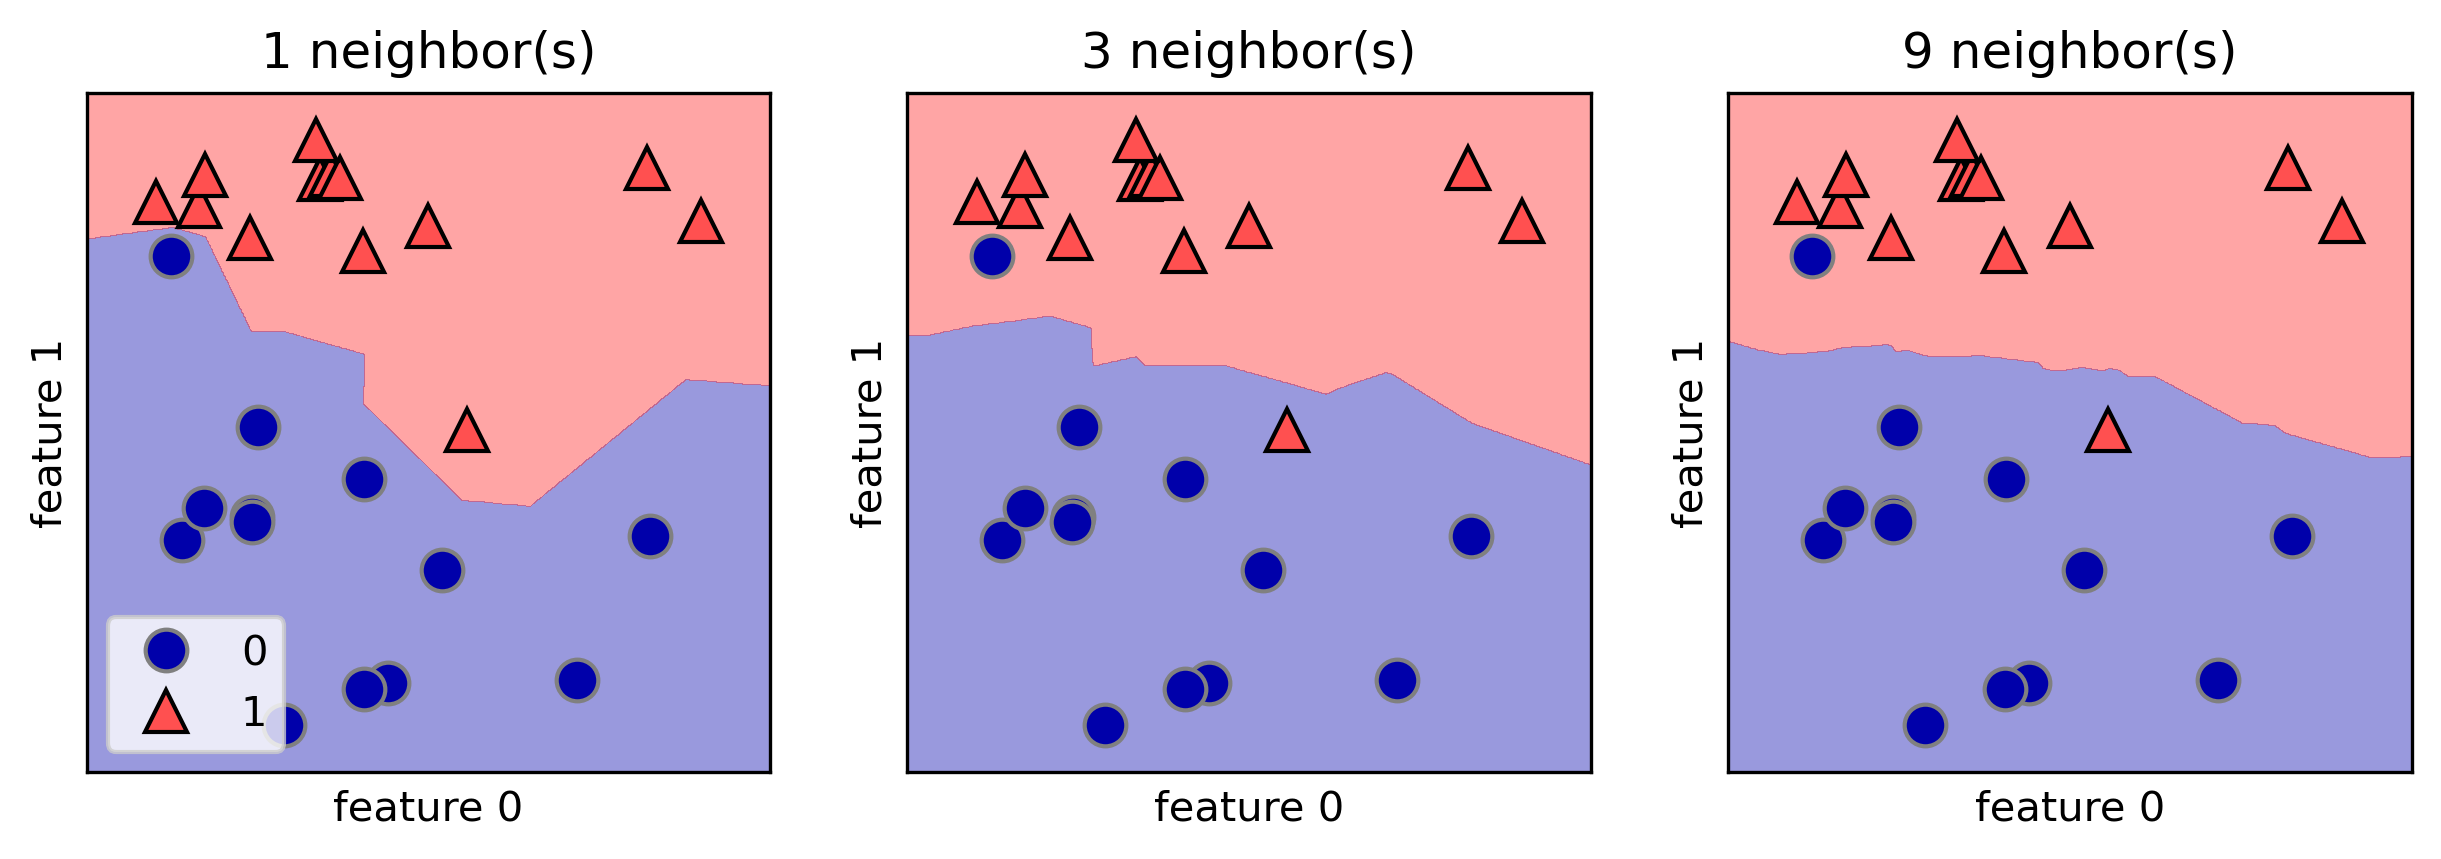

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3)) # 한 row에 그림을 3개 그린다.

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{n_neighbors} neighbor(s)')
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

1 neighbor가 제일 정확도가 높지만, 이 경우는 training set의 과적합이 의심된다.

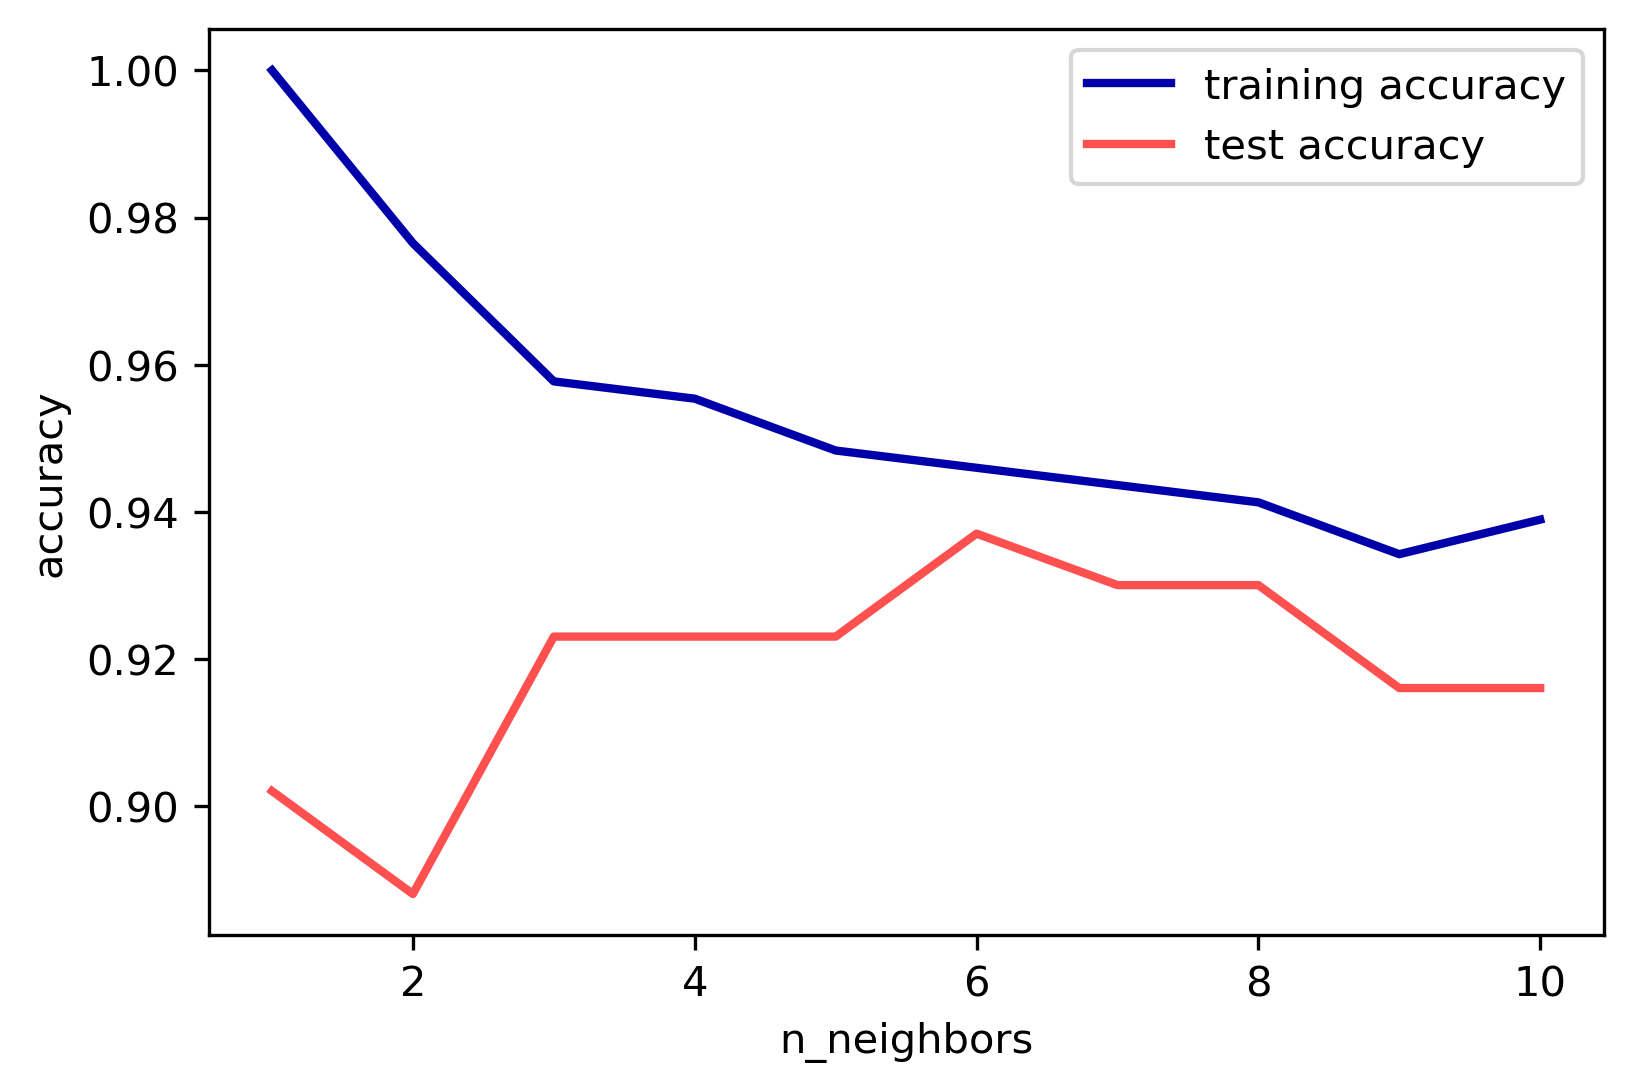

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy= []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

n_neighbors 가 6일때 제일 성능이 일반화가 잘 되었다는 것을 볼 수 있다.

## K-NN regression

K-NN regression은 예를 들어, 훈련된 해당 모델에 어떤 feature 값이 들어왔을 때, 그 독립변수의 y값이 무엇인지 정하는 것이다.
각각의 데이터와 거리가 제일 가까운 데이터를 통해 새로운 데이터의 y값을 예측한다. 만약 여러 이웃을 통해서 y값을 예측한다면, 평균을 내리면 된다. 그러므로 y값의 평균을 내면 편하다.

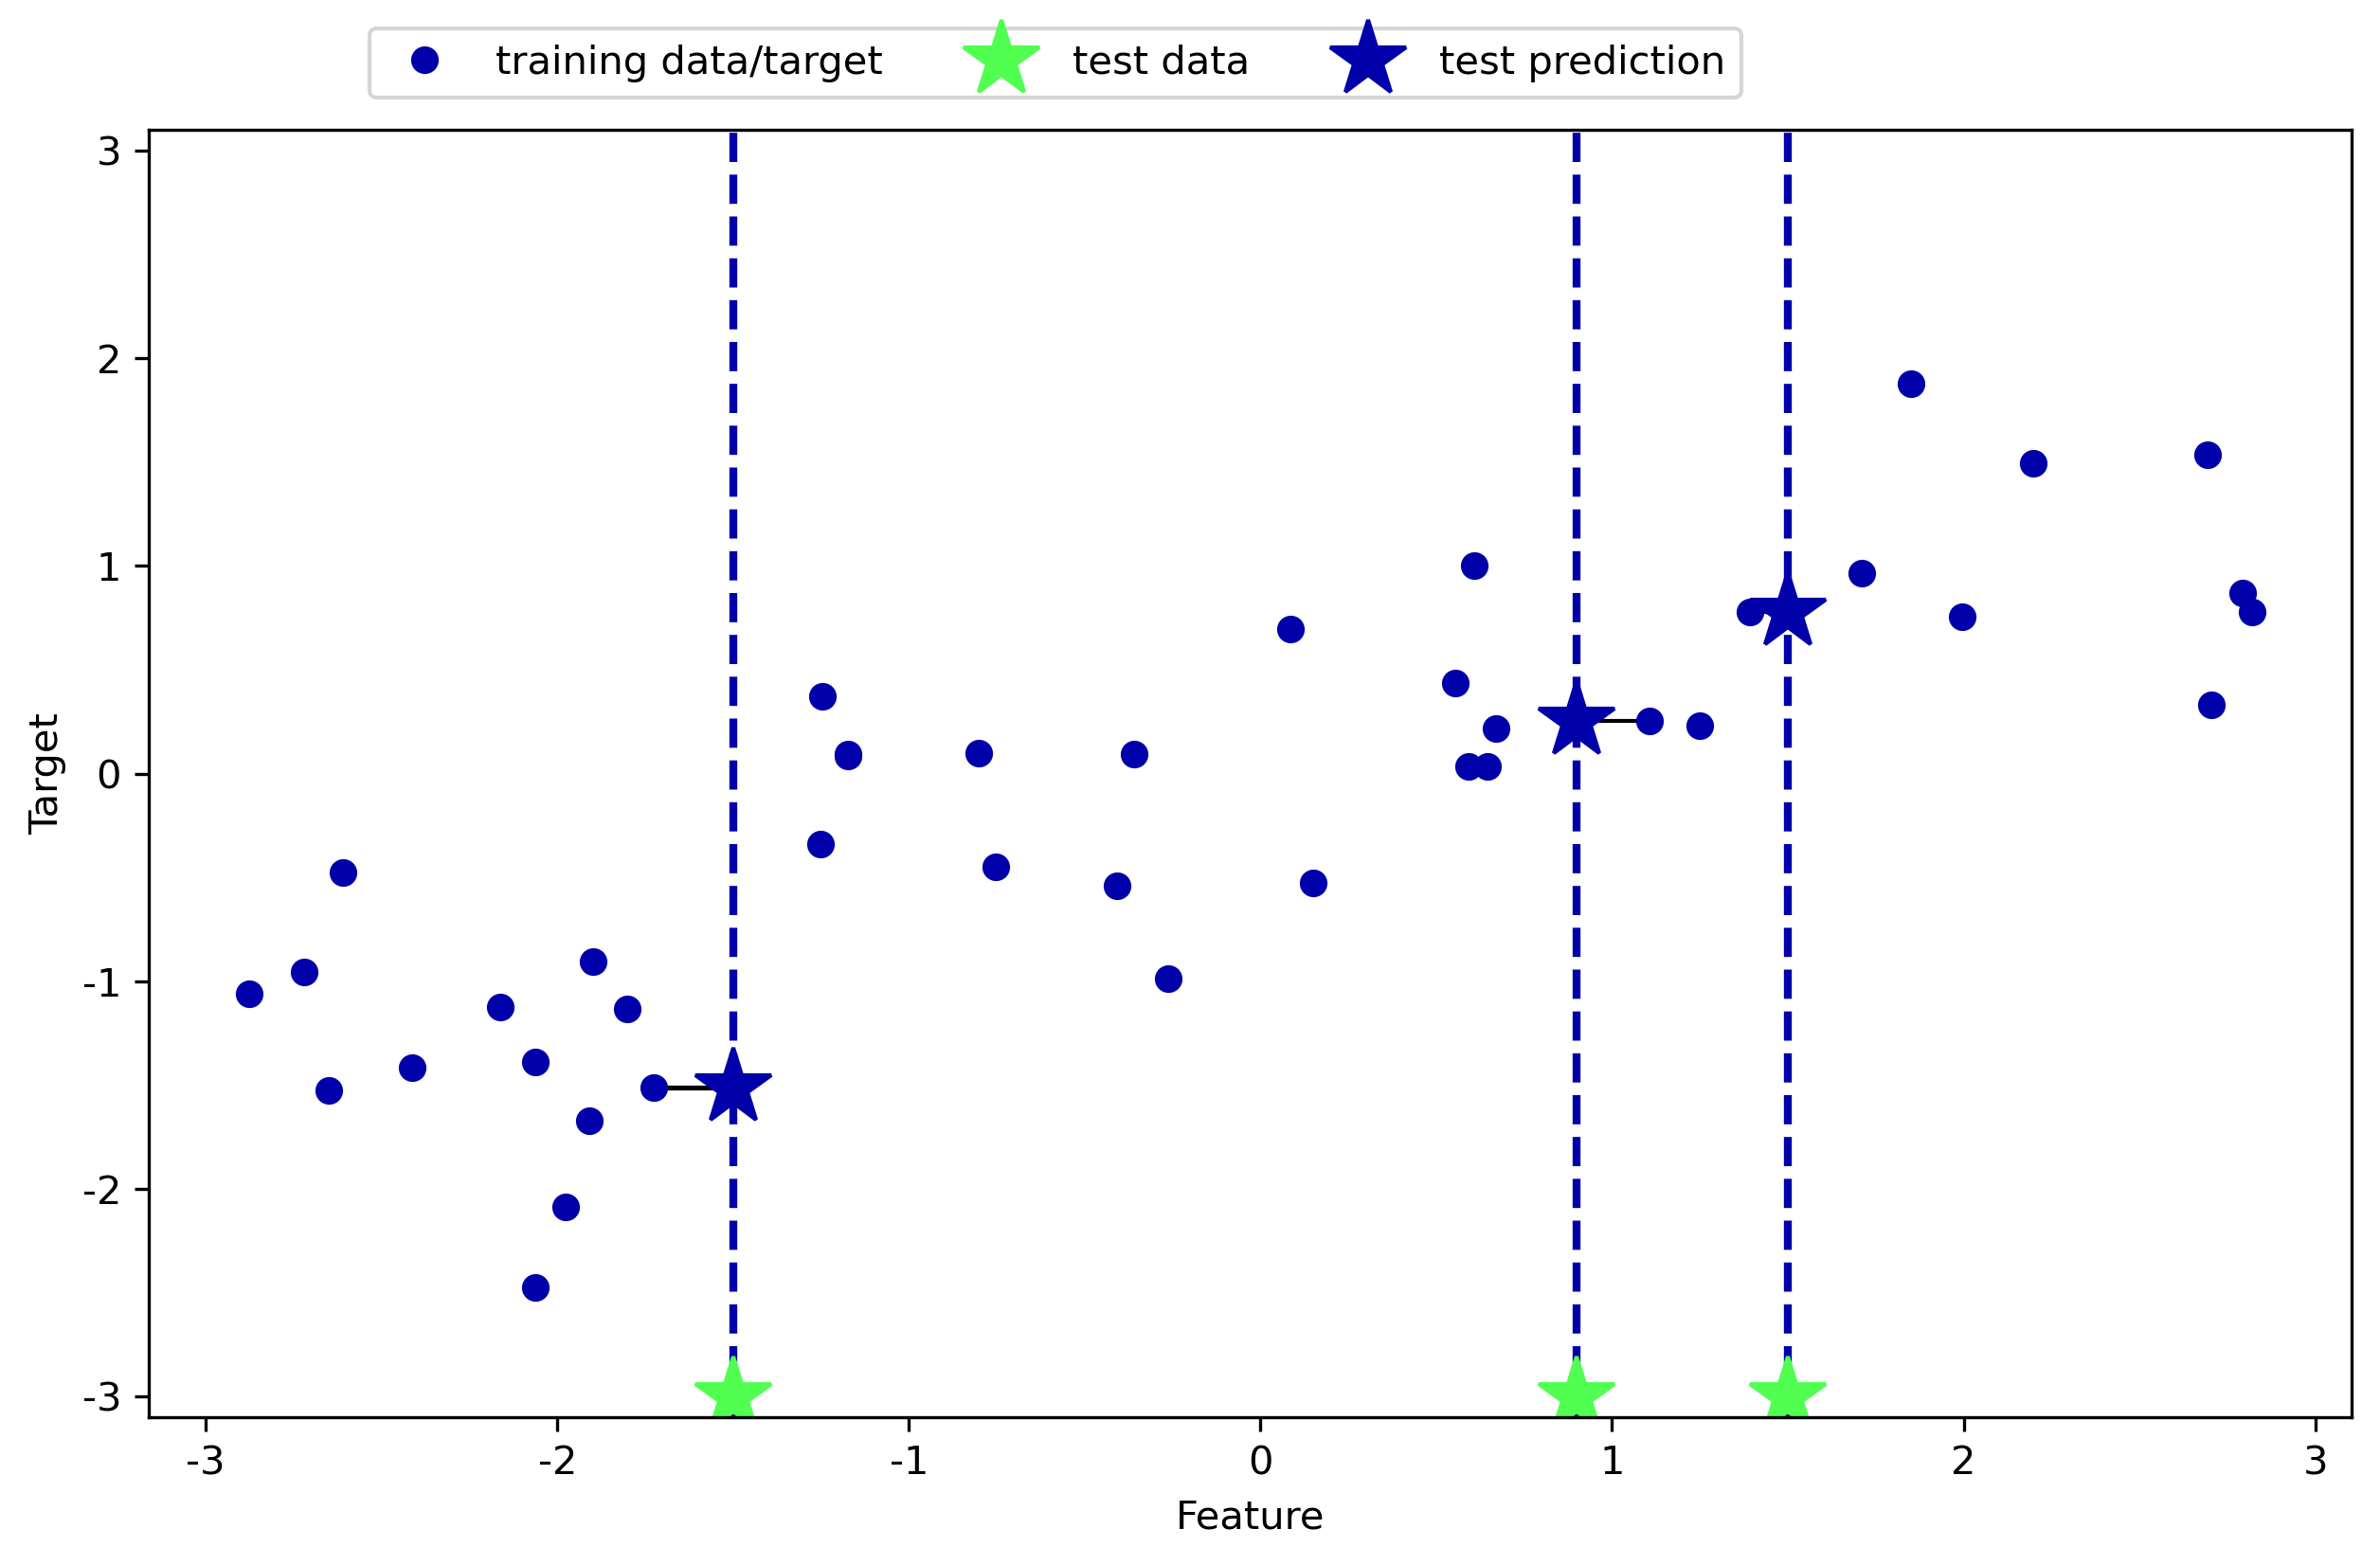

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

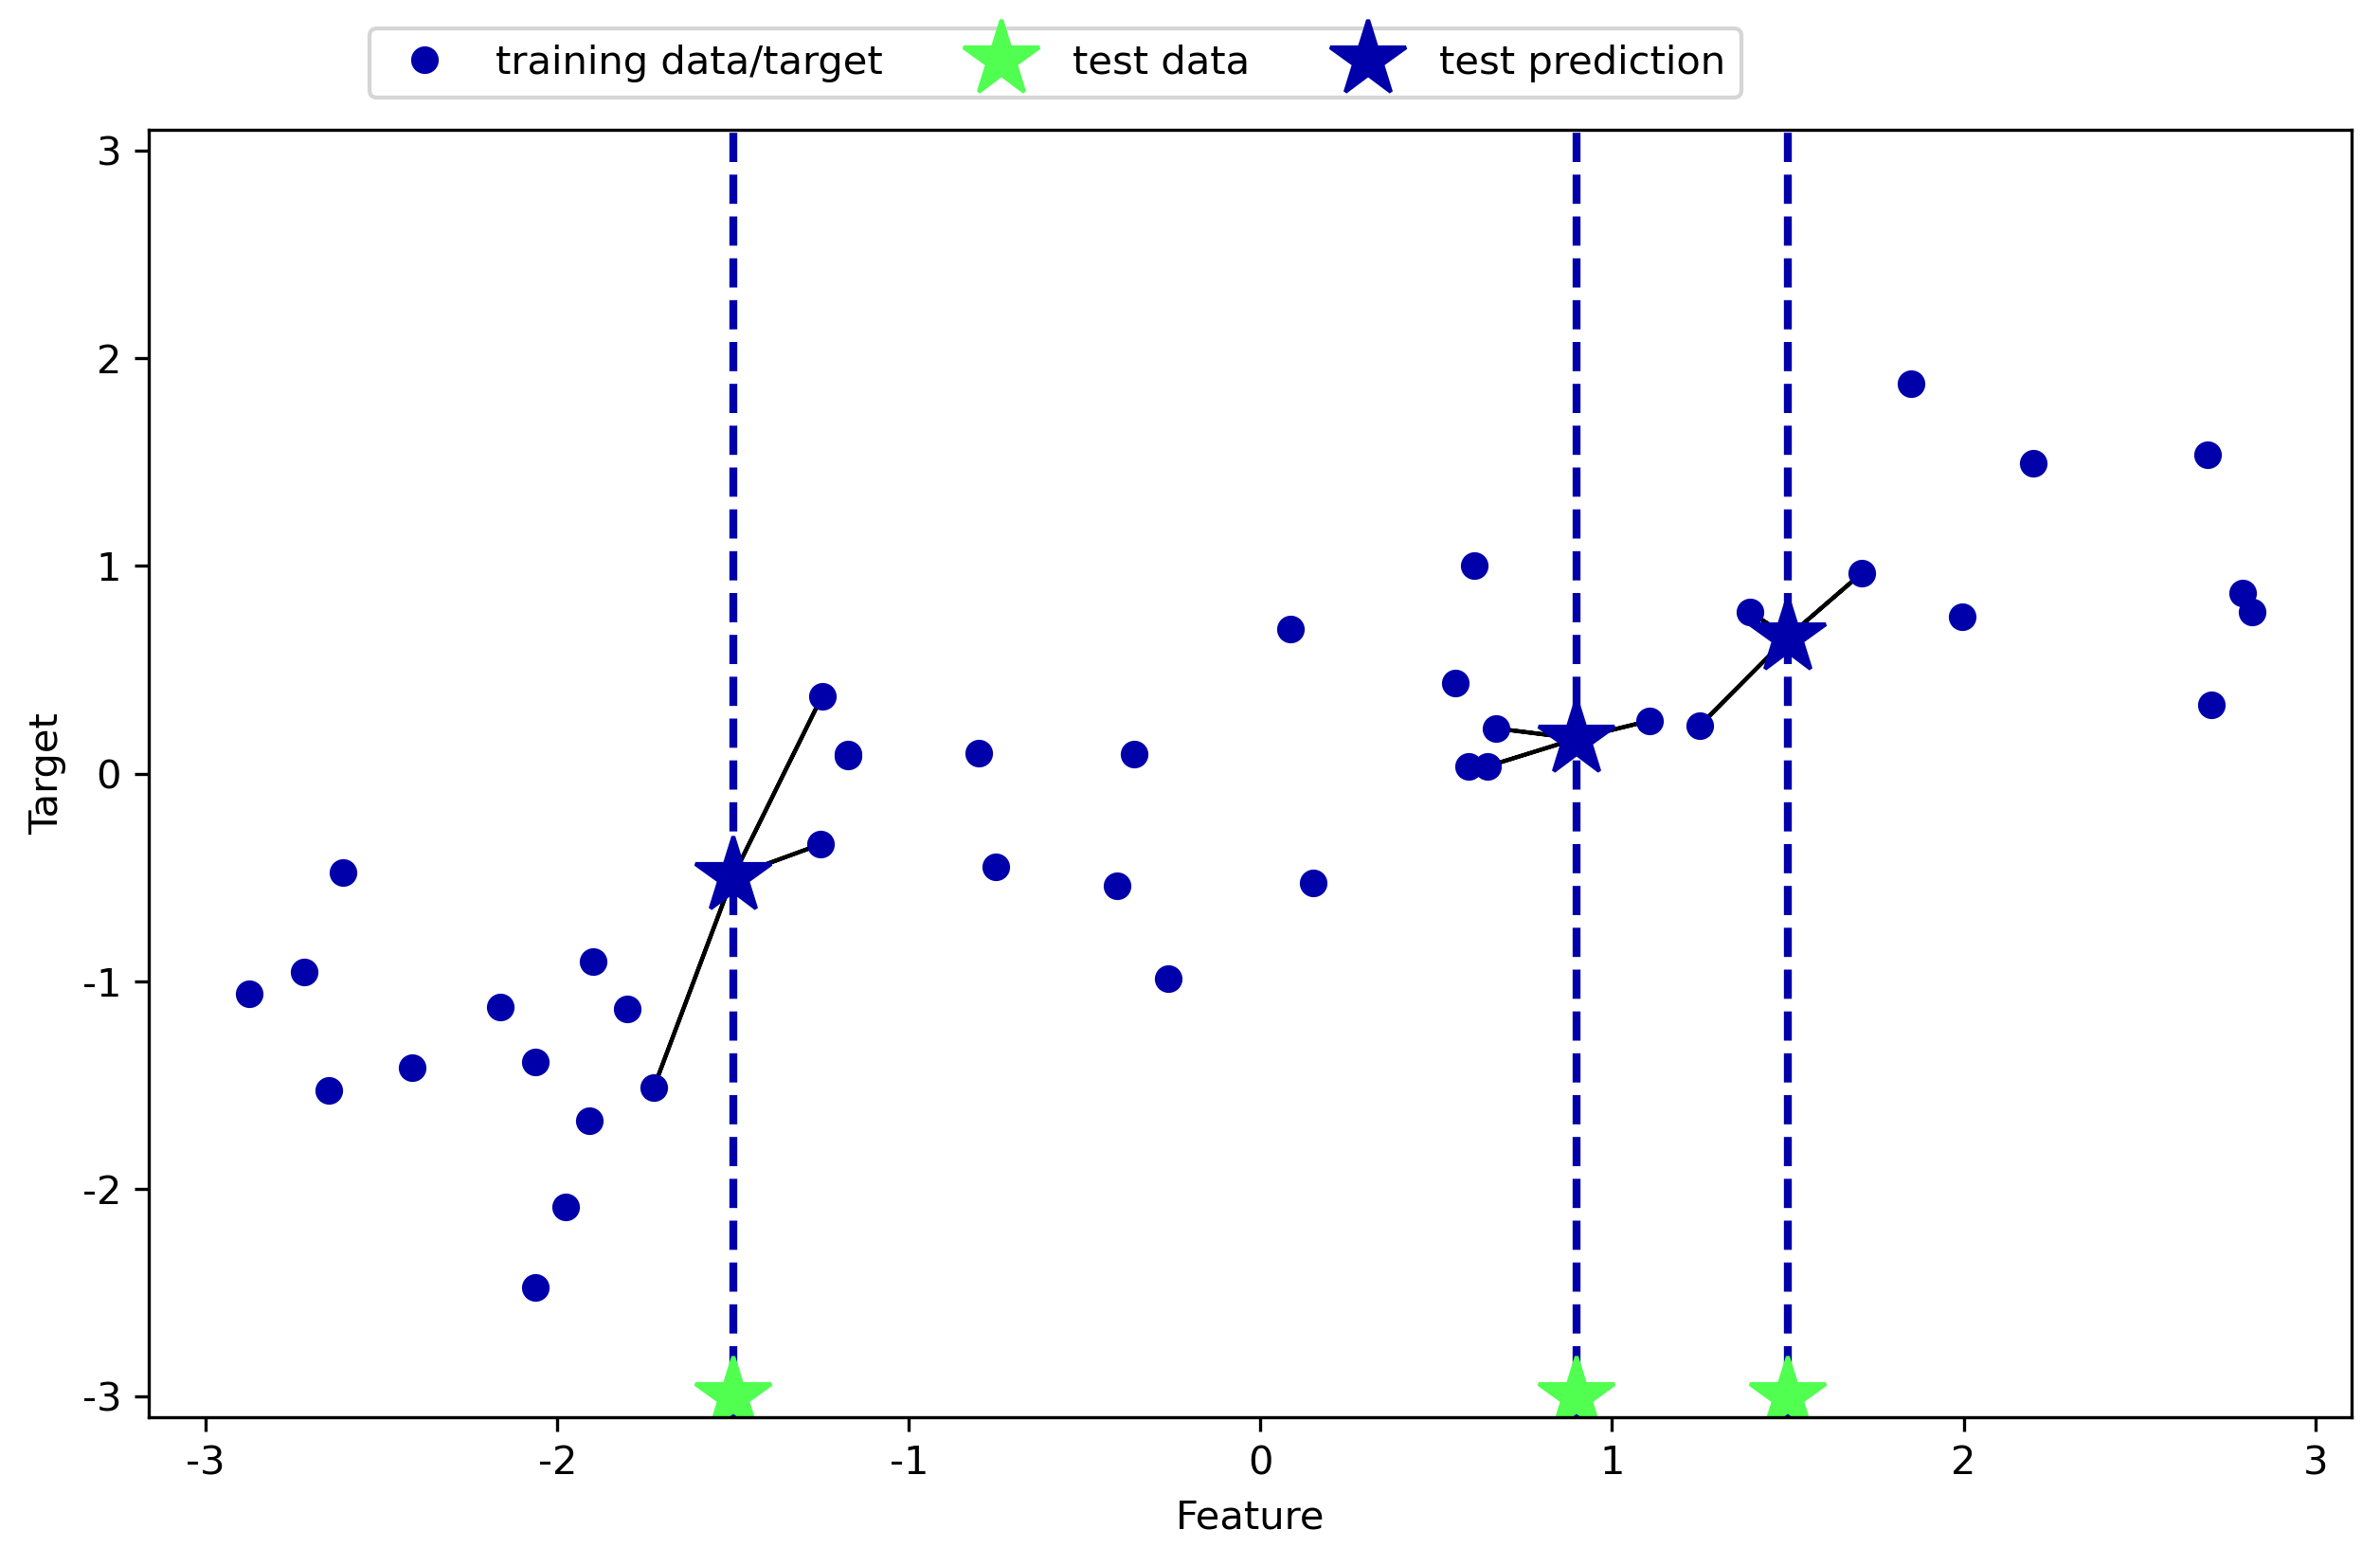

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [23]:
print(f'Test set prediction: {reg.predict(X_test)}')

Test set prediction: [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [24]:
print(f'Test set R^2: {reg.score(X_test, y_test):.2f}') # regression에서 정확도를 측정하는 방법은 r^2이다.
# 1 - 시그마/시그마 

Test set R^2: 0.83


## KNN 분석

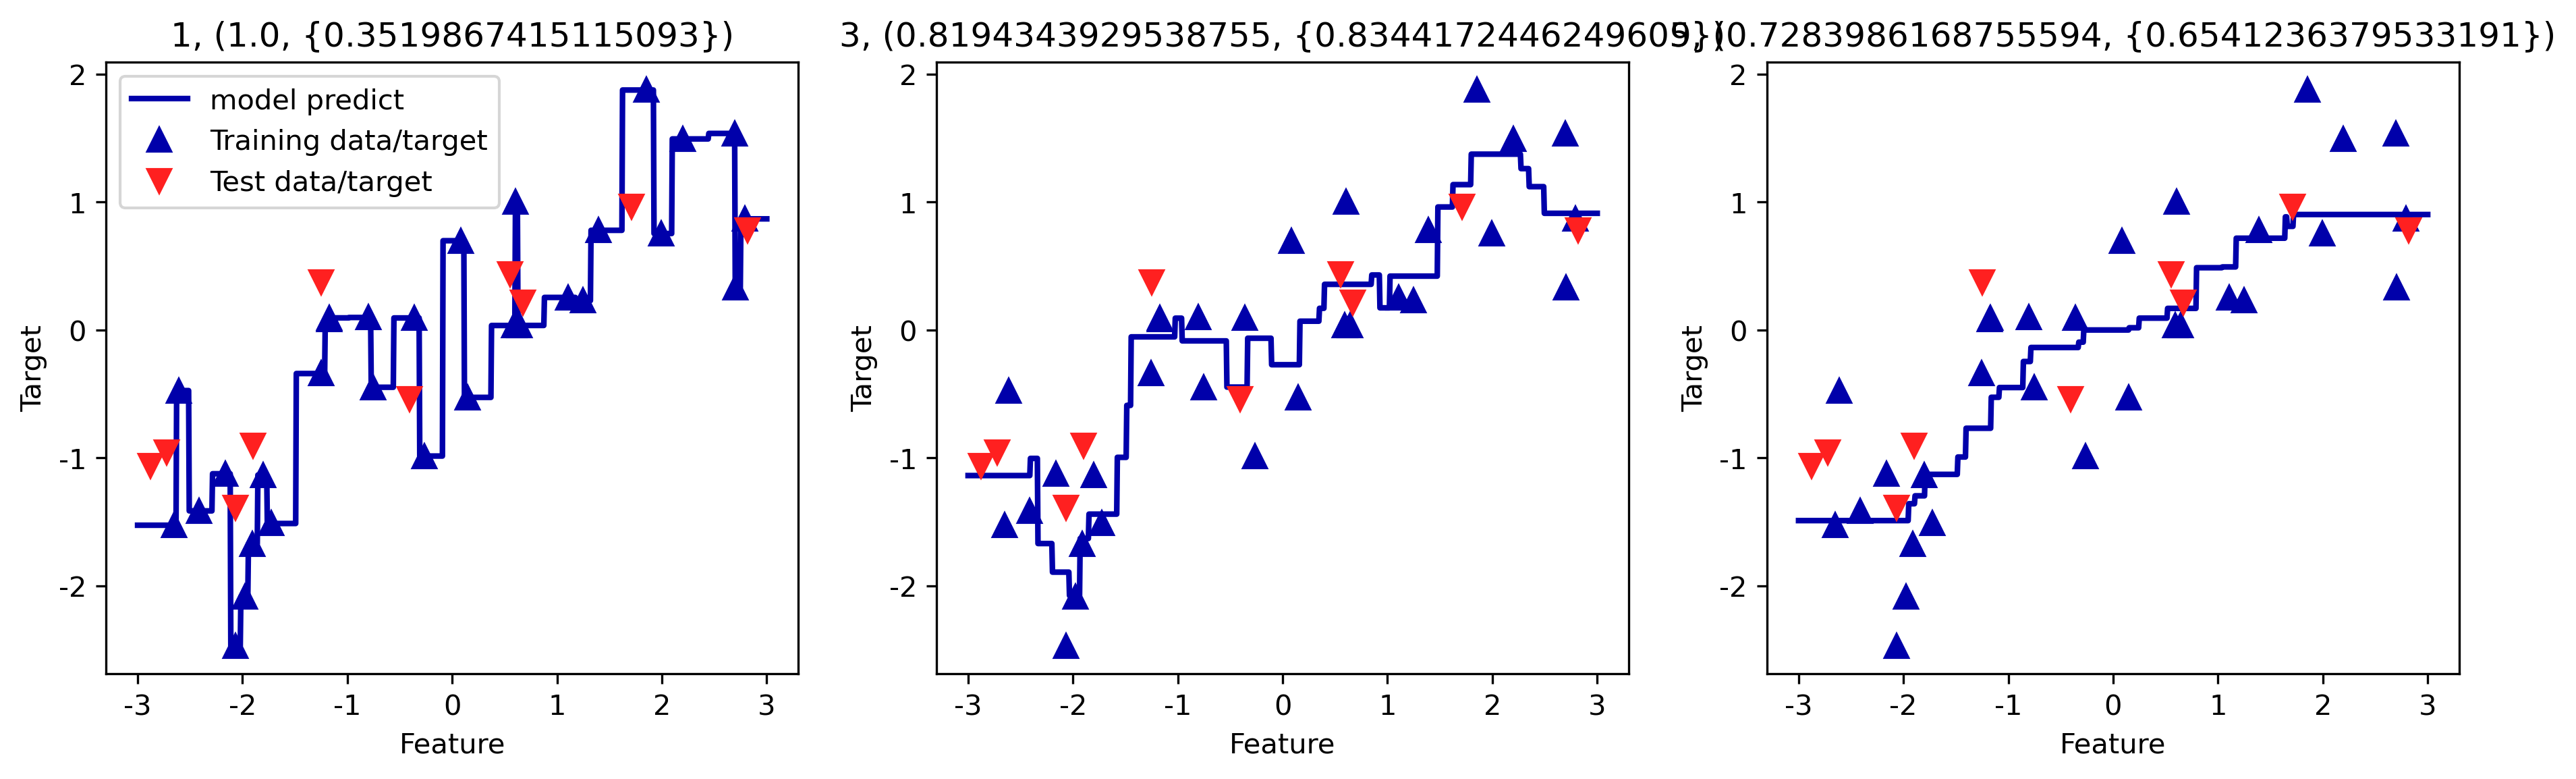

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1,1) # test 데이터를 별도로 만들어서 예측한 결과를 선으로 나타내었다.
-3~3 사이에 1000개의 데이터로 나누었다.

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(f'{n_neighbors}, {reg.score(X_train, y_train), {reg.score(X_test, y_test)}}')
    
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['model predict', 'Training data/target', 'Test data/target'], loc='best')
                 
        

위 그래프에서 n_neighbor가 3인 경우가 정확도가 높다. 일반화가 잘 이루어진 케이스